# Vidéo dans un notebook

Ce notebook montre comment visualiser une vidéo dans un notebook.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Un texte qui défile sur une image

In [2]:
from code_beatrix.art.video import video_image, video_position

img = 'data/GastonLagaffe_1121.jpg'
vidimg = video_image(img, duration=5, opacity=200)
vidimg = video_position(vidimg, lambda t: (0, 0), relative=True)

In [3]:
from code_beatrix.art.video import video_text, video_compose

text = video_text('Gaston', size=2., color=(255, 0, 0, 128), background=(0, 255, 0, 100))
text = video_position(text, lambda t: (t * 0.1, t * 0.2), relative=True)

comb = video_compose([vidimg, text], t1=[0, 1])

In [4]:
comb.set_duration(5).ipython_display(fps=20)

 99%|███████████████████████████████████████████████████████████████████████████████▏| 100/101 [00:01<00:00, 91.92it/s]


In [5]:
from code_beatrix.art.video import video_save
video_save(comb.set_duration(5), 'video.gif', fps=20, verbose=True)


[MoviePy] Building file video.gif with imageio


 99%|███████████████████████████████████████████████████████████████████████████████▏| 100/101 [00:04<00:00, 23.42it/s]


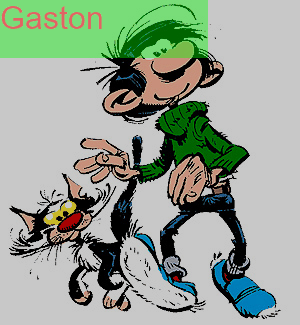

In [6]:
from IPython.display import Image
Image("video.gif")

In [7]:
# comb.set_duration(5).ipython_display('video.avi', fps=20, codec='png')  # format avi
comb.set_duration(5).ipython_display('video.mp4', fps=20)                 # format mp4

 99%|███████████████████████████████████████████████████████████████████████████████▏| 100/101 [00:01<00:00, 83.85it/s]


## Un petit bonhomme qui marche

On s'inspire des dessins animés en dessinant image avec le module [gizeh](https://github.com/Zulko/gizeh). L'article [Vector Animations With Python](http://zulko.github.io/blog/2014/09/20/vector-animations-with-python/) montre d'autres exemples assez amusant. Le bonhomme patine plus qu'il ne marche. A améliorer.

In [8]:
import gizeh
from math import pi, sin, cos
from code_beatrix.art.video import video_frame

def bonhomme(t):
    surface = gizeh.Surface(228,128)
    radius = 10
    t = t*2
    
    # jambe 1
    angle = sin(t)*pi/4 + pi/2
    lx = 25
    dx = lx/2 * cos(angle)
    dy = lx/2 * sin(angle)
    
    ddy = 25-2*dy         # pour donner l'impression que la tête monte et descend
    px = t*10 + 25-2*dx - 50    # position du bonhomme dans l'image
    
    bar = gizeh.rectangle(lx=lx, ly=4, xy=(64+dx+px,60+dy+ddy), angle=angle, fill=(1,0,0))
    bar.draw(surface)

    # jambe 2
    angle = -sin(t)*pi/4 + pi/2
    dx = lx/2 * cos(angle)
    dy = lx/2 * sin(angle)
    bar = gizeh.rectangle(lx=lx, ly=4, xy=(64+dx+px,60+dy+ddy), angle=angle, fill=(1,0.3,0))
    bar.draw(surface)

    # tronc et tête
    circle = gizeh.circle(radius, xy = (64+px,30++ddy), fill=(1,0,0))    
    circle.draw(surface)
    bar = gizeh.rectangle(lx=6, ly=20, xy=(64+px,50+ddy), fill=(1,0,0))
    bar.draw(surface)
    
    # fin
    return surface.get_npimage()

comb = video_frame(bonhomme)
comb.set_duration(10).ipython_display('bonhomme.mp4', fps=20)

100%|██████████████████████████████████████████████████████████████████████████████▌| 200/201 [00:00<00:00, 569.10it/s]
